In [4]:
# 3.1
# 参照书上的图3.1。当一个二维空间中给出已知的训练实例的时候，进行训练，并且画出空间划分图

/Users/calluo/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/calluo/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

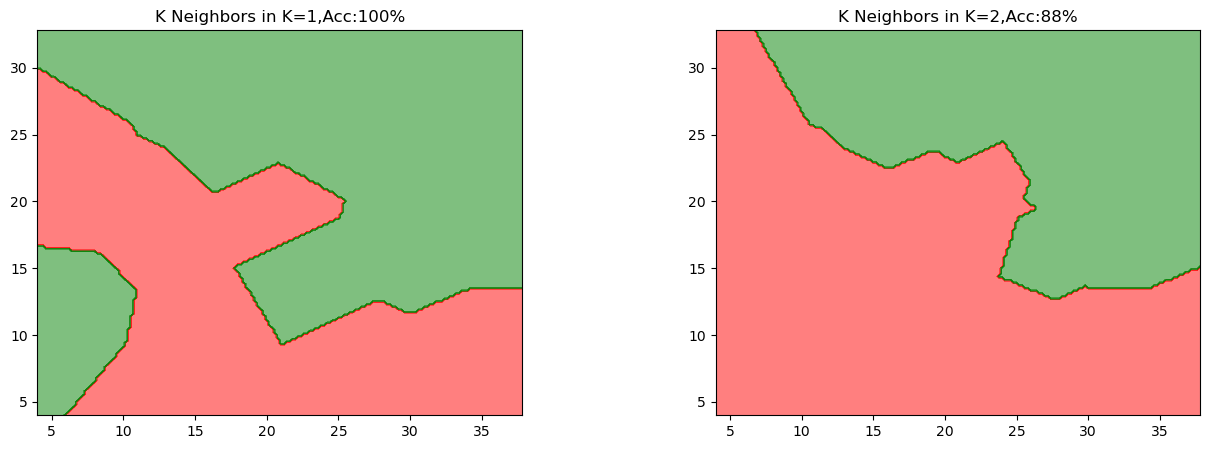

In [102]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


data = np.array([
    [5, 12, 1],
    [6, 21, 0],
    [14, 5, 0],
    [16, 10, 0],
    [13, 19, 0],
    [13, 32, 1],
    [17, 27, 1],
    [18, 24, 1],
    [20, 20, 0],
    [23, 14, 1],
    [23, 25, 1],
    [23, 31, 1],
    [26, 8, 0],
    [30, 17, 1],
    [30, 26, 1],
    [34, 8, 0],
    [34, 19, 1],
    [37, 28, 1]
]) # 注意这里是整个训练集，包括了前两个x1x2以及第三个y
x_train = data[:, 0:2]
y_train = data[:, 2]

# 利用sklearn构造k邻近模型
# n_neighbors就是k的大小，n_jobs是要用多少线程来算，-1表示全用上
# 其实和前面perceptron一样的，就是引用了一个类
# 这里的distance表示，距离近的元素相比距离远的具有更高的权重
# 用distance的话，K值改变就没啥意义了，所以这里还是用uniform
model1_k1 = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1, weights = 'uniform')
model1_k2 = KNeighborsClassifier(n_neighbors = 2, n_jobs = -1, weights = 'uniform')

# 模型训练
model1_k1 = model1_k1.fit(x_train, y_train)
model1_k2 = model1_k2.fit(x_train, y_train)
models = (model1_k1, model1_k2)


# 画图
# 设置图形标题
tittles = ['K Neighbors in K=1', 'K Neighbors in K=2']
# 设置图形的大小以及间距
fig = plt.figure(figsize = (15, 5))
# 这里返回了一个<Figure size 1500x500 with 0 Axes>，可以说明，ax其实就是个图层的意思
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
# 通过特征向量的范围来设置坐标轴的阈值
x1, x2 = x_train[:, 0], x_train[:, 1]
x1_min, x1_max = x1.min() - 1, x1.max() + 1
x2_min, x2_max = x2.min() - 1, x2.max() + 1

# 生成一个网格点坐标矩阵，用来进行预测
# 可以看到传入的是一个数组，这里0.2是为了多生成一些用来预测的坐标点
x1_mesh, x2_mesh = np.meshgrid(np.arange(x1_min, x1_max, 0.2),
                              np.arange(x2_min, x2_max, 0.2))
# 注意这里在构建矩阵的时候，必须按照上面的格式来构建，这样才是一个一一对应的坐标矩阵，不然会出错的
# 这里所谓的网格点坐标矩阵，其实就是两个矩阵，分别表示横纵坐标，这些坐标表示了一个坐标系中的点的位置

# 这里因为我们有两种情况，所以我们使用一个for循环来画图
for model, tittle, ax in zip(models, tittles, fig.subplots(1, 2)):
    # 生成了预测结果，并且把它和我们预测所用到的数据集对应起来
    z = model.predict(np.c_[x1_mesh.ravel(), x2_mesh.ravel()])
    z = z.reshape(x1_mesh.shape)
    colors = ('red', 'green', 'lightgreen', 'grey', 'cyan')
    # 根据类别数生成颜色
    # 就是传入一个颜色列表，然后挑选其中的一定类别数
    cmap = ListedColormap(colors[:len(np.unique(z))])
    # 画分割线
    ax.contourf(x1_mesh, x2_mesh, z, cmap = cmap, alpha = 0.5)
    
    # 根据预测结果，计算准确率
    acc = model.score(x_train, y_train)
    # 设置标题
    ax.set_title(tittle + ',Acc:%d%%' % (acc * 100)) # 注意这里的占位符以及转义的使用～
    
    
plt.show()


# 从图里面可以发现，当不设置权重的时候，k越大，我们的模型越简单，同时也越容易出现欠拟合的情况

In [108]:
# 3.2
# 利用书例题3.2构造的kd tree寻找x=(3,4.5)T的最近邻点
# 其实在sklearn里面也集成了kd tree，直接用就行了
# 这里默认构造的是一个平衡KD tree，也就是书里面讲的那种

In [130]:
import numpy as np
from sklearn.neighbors import KDTree


data_train = np.array([
    [2, 3],
    [5, 4],
    [9, 6],
    [4, 7],
    [8, 1],
    [7, 2]
])

# 构造
tree = KDTree(data_train, leaf_size = 2) # 2表示平衡树

# 搜索kd tree
# 用array传入要搜索的点，并且设置k
dist, ind = tree.query(np.array([[3, 4.5]]), k = 1) # 返回两个值，分别是最近节点的距离和位置
nearest_index = ind[0]


print('最邻近点是({},{})，距离为{}'.format(data_train[nearest_index][0][0], data_train[nearest_index][0][1],
     dist[0][0]))

最邻近点是(2,3)，距离为1.8027756377319946


In [131]:
# 3.3
# 参考书3.3算法，写出k近邻算法

In [11]:
# 首先，构造一个类来表示我们构建KD tree时候的node
class Node:
    def __init__(self, value, index, left_child, right_child):
        self.value = value.tolist()
        self.index = index
        self.left_child = left_child
        self.right_child = right_child
        
        
# 接下来，就是构造KD Tree
class KDTree:
    def __init__(self, data):
        self.data = np.asarray(data) # 这里是为了防止输入数据不是数组，将其先转化为一个数组
        self.kd_tree = None
        self._create_kdTree(data) # 显然，递归
        
    def _split_sub_tree(self, data, depth = 0): # 默认开始的时候，肯定是从根结点开始的
        # 在构造的过程中，如果所有实例都作为了结点，那肯定就构造完了
        if len(data) == 0:
            return None
        # 首先，选择第一个要进行切分的坐标轴
        # 可以随便选，也可以按照规律选择方差最大的那一维特征值
        l = depth % data.shape[1]
        # 依据这个维度的特征值，对数据进行排序，并且取中位值
        data = data[data[:, l].argsort()] # argsort会对数组进行排序，返回的是该元素在排序前的数组中的index
        median_index = data.shape[0] // 2
        # 接下来，我们需要获得这个结点在数据集中的位置，注意，这里的数据集是原始的数据集
        # 所以可以发现下面用的是self.data
        node_index = [i for i, v in enumerate(self.data) if list(v) == list(data[median_index])]
        # 这样我们就拿到了我们选择好的结点，在原始数据中的位置
        # 接下来，就可以返回结点信息了，借用我们之前构造好的Node class
        return Node(
        value = data[median_index],
        index = node_index[0], # 注意，返回的应该是一个list，用[0]取出来
        left_child = self._split_sub_tree(data[:median_index], depth + 1),
        right_child = self._split_sub_tree(data[median_index + 1:], depth + 1)
        ) # 可以发现，这里就是利用了排序后的数据，来进行一个不停的递归操作
        
    def _create_kdTree(self, X_data):
        self.kd_tree = self._split_sub_tree(X_data) # 这函数就是用来调用的一个函数，然后最后把构造结果放到kd_tree
    
    # 开始搜索kd tree
    # 两个参数分别是我们需要搜索的元素，以及kNN的k值
    def query(self, data, k = 1):
        data = np.asarray(data)
        # 这里就是写调用我们后面定义的搜索函数，并且用hits来储存结果
        hits = self._search(data, self.kd_tree, k = k, k_neighbors_sets = list())
        # 分别是距离和坐标
        dd = np.array([hit[0] for hit in hits])
        ii = np.array([hit[1] for hit in hits])
        return dd, ii
        
    # 计算两个结点之间的距离    
    @staticmethod    
    def _cal_node_distance(node1, node2):
        return np.sqrt(np.sum(np.square(node1 - node2)))
    
    # 来写搜索函数的主体部分
    def _search(self, point, tree = None, k = 1, k_neighbors_sets = None, depth = 0):
        n = point.shape[0]
        # k_neighbors_sets到底是个啥，后面会有
        if k_neighbors_sets == None:
            k_neighbors_sets = []
        if tree == None:
            return k_neighbors_sets
        
        # 搜索第一步，肯定是找到含有目标点的结点
        # 那首先，我们还需要在下面定义一个，计算目标点与结点距离的函数
        if tree.left_child == None and tree.right_child == None: # 肯定是从最深的一级树开始搜索
            return self._update_k_neighbor_sets(k_neighbors_sets, k, tree, point)
        # 接下来，就开始递归的访问更前面的kdTree
        # point可能是一个，list
        if point[0][depth % n] < tree.value[depth % n]:
            direct = 'left'
            next_branch = tree.left_child
        else:
            direct = 'right'
            next_branch = tree.right_child
        if next_branch is not None:
            # 此时意味着我们需要接着进行递归，需要检查是否与该子结点的另一半边区域相交
            k_neighbors_sets = self._search(point, tree = next_branch, k = k, depth = depth + 1, k_neighbors_sets = k_neighbors_sets)
            # 计算目标点和分割超平面的距离
            temp_dist = abs(tree.value[depth % n] - point[0][depth % n])
            
            if direct == 'left': # 这是一边的情况，另一边代码是完全一样的，写一个else就可以了
                # 判断超球体和超平面是否相交
                if not (k_neighbors_sets[0][0] < temp_dist and len(k_neighbors_sets) == k):
                    # 相交的话，那就正常的递归搜索
                    # 判断当前的最近结点，并且更新k临近点集
                    k_neighbors_sets = self._update_k_neighbor_sets(k_neighbors_sets, k, tree, point)
                    return self._search(point, tree = tree.right_child, k = k, depth = depth + 1,
                                   k_neighbors_sets = k_neighbors_sets) # 注意，这里tree参数用了tree.right_child，其实就是在这里用递归啦
            else:
                # 判断超球体和超平面是否相交
                if not (k_neighbors_sets[0][0] < temp_dist and len(k_neighbors_sets) == k):
                    # 相交的话，那就正常的递归搜索
                    # 判断当前的最近结点，并且更新k临近点集
                    k_neighbors_sets = self._update_k_neighbor_sets(k_neighbors_sets, k, tree, point)
                    return self._search(point, tree = tree.left_child, k = k, depth = depth + 1,
                                   k_neighbors_sets = k_neighbors_sets)
        else:
            return self._update_k_neighbor_sets(k_neighbors_sets, k, tree, point)
        
        return k_neighbors_sets
        
    def _update_k_neighbor_sets(self, best, k, tree, point):
        # 可以看出，k_neighbor_sets就是k个最近的结点
        # 首先计算结点与目标点之间的距离
        node_distance = self._cal_node_distance(point, tree.value)
        if len(best) == 0:
            # 注意这里添加最近结点的时候，是用了一个元祖的形式添加到列表当中
            best.append((node_distance, tree.index, tree.value))
        elif len(best) < k:
            # 我们kNN算法的目的就是，找到k个最临近的点来进行分类判断，这里就是如果我们的k临近点数小于k，那我们就需要加入点进去
            self._insert_k_neighbor_sets(best, tree, node_distance)
        else:
            # 这里其实就是，如果到结点距离小于目前k最近点列表中最大距离，那就把最大的那个挤掉了，因为我们不管怎么说，都是要找更小的距离的点
            if best[0][0] > node_distance:
                best = best[1:]
                self._insert_k_neighbor_sets(best, tree, node_distance) # 运行下面我们写好的插入排序函数
        return best
        
    @staticmethod
    # 将k个点中最远的，放在最前面
    def _insert_k_neighbor_sets(best, tree, node_distance):
        n = len(best)
        for i, item in enumerate(best):
            if item[0] < node_distance: # 还记得我们前面往best里面加东西的时候，node_distance是放在第一个的
                best.insert(i, (node_distance, tree.index, tree.value)) # 等于是距离大的，直接插队
                break
        if len(best) == n:
            best.append((node_distance, tree.index, tree.value))
            
            
# 打印信息
def print_k_neighbor_sets(k, ii, dd):
    if k == 1:
        text = "x点的最近邻点是"
    else:
        text = "x点的%d个近邻点是" % k

    for i, index in enumerate(ii):
        res = X_train[index]
        if i == 0:
            text += str(tuple(res))
        else:
            text += ", " + str(tuple(res))

    if k == 1:
        text += "，距离是"
    else:
        text += "，距离分别是"
    for i, dist in enumerate(dd):
        if i == 0:
            text += "%.4f" % dist
        else:
            text += ", %.4f" % dist

    print(text)

In [12]:
import numpy as np

X_train = np.array([[2, 3],
                    [5, 4],
                    [9, 6],
                    [4, 7],
                    [8, 1],
                    [7, 2]])
kd_tree = KDTree(X_train)
# 设置k值
k = 1
# 查找邻近的结点
dists, indices = kd_tree.query(np.array([[3, 4.5]]), k=k)
# 打印邻近结点
print_k_neighbor_sets(k, indices, dists)

x点的最近邻点是(2, 3)，距离是1.8028
